## Imports

Import required libraries for data processing, visualization, and analysis.


In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pyarrow as pa

### Load Raw Datasets
Reading CSV files from the raw data directory.

In [25]:
aisles=pd.read_csv("../data/raw/aisles.csv")
departments=pd.read_csv("../data/raw/departments.csv")
order_prior=pd.read_csv("../data/raw/order_products__prior.csv")
order_train=pd.read_csv("../data/raw/order_products__train.csv")
orders=pd.read_csv("../data/raw/orders.csv")
products=pd.read_csv("../data/raw/products.csv")

###  Data Preview
Displaying the first 5 rows of each dataframe to understand the schema.

In [26]:
print("Aisles\n",'-'*70)
display(aisles.head())

print('Departments\n','-'*70)
display(departments.head())

print('Order Products Prior\n','-'*70)
display(order_prior.head())

print('Order Product Train\n','-'*70)
display(order_train.head())

print('Orders\n','-'*70)
display(orders.head())

print('Products\n','-'*70)
display(products.head())


Aisles
 ----------------------------------------------------------------------


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Departments
 ----------------------------------------------------------------------


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Order Products Prior
 ----------------------------------------------------------------------


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Order Product Train
 ----------------------------------------------------------------------


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Orders
 ----------------------------------------------------------------------


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Products
 ----------------------------------------------------------------------


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Data Quality and Memory Optimization
Check data structure, reduce memory usage, inspect missing values, and summary statistics for the most important datasets.


In [27]:
print('Order Products Prior (Info) \n','-'*70)
order_prior.info(show_counts=True)
print('\n')
print('Order Product Train (Info)\n','-'*70)
order_train.info(show_counts=True)
print('\n')
print("Orders (Info)\n",'-'*70)
orders.info(show_counts=True)

Order Products Prior (Info) 
 ----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_order  32434489 non-null  int64
 3   reordered          32434489 non-null  int64
dtypes: int64(4)
memory usage: 989.8 MB


Order Product Train (Info)
 ----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int6

In [28]:
def optimize_memory(df):
    for col in df.columns:
        if df[col].dtype=='int64':
            df[col]=df[col].astype('int32')
        elif df[col].dtype=='float64':
            df[col]=df[col].astype('float32')    
    return df 

orders=optimize_memory(orders)
order_prior=optimize_memory(order_prior)
order_train=optimize_memory(order_train)        

In [29]:
print('Missing Value in Order Products Prior\n','-'*70)
display(order_prior.isna().sum())

print('Missing Value in Order Product Train\n','-'*70)
display(order_train.isna().sum())

print("Missing Value in Orders\n",'-'*70)
display(orders.isna().sum())

Missing Value in Order Products Prior
 ----------------------------------------------------------------------


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Missing Value in Order Product Train
 ----------------------------------------------------------------------


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Missing Value in Orders
 ----------------------------------------------------------------------


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

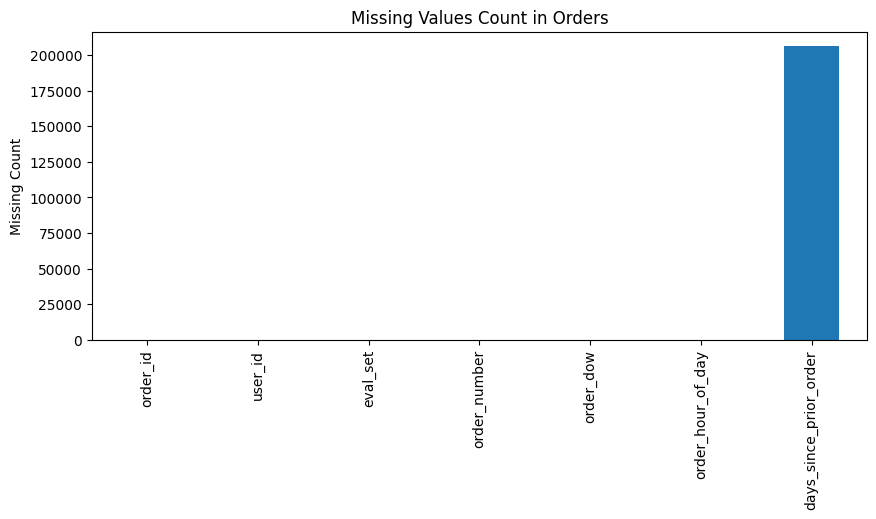

In [30]:
orders.isna().sum().plot(kind='bar', figsize=(10,4))
plt.ylabel('Missing Count')
plt.title('Missing Values Count in Orders')
plt.show()


In [31]:
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(0)
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [34]:
display(orders.describe())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.044488e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.308726e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


## Dataset Merging
Combine related tables to build unified prior and train datasets for the analysis.

In [35]:
full_products=products.merge(aisles,on='aisle_id',how='left').merge(departments,on='department_id',how='left')
full_products.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [36]:
full_priors=order_prior.merge(orders,on='order_id',how='left').merge(full_products,on='product_id',how='left')
full_priors.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [37]:
full_train=order_train.merge(orders,on='order_id',how='left').merge(full_products,on='product_id',how='left')
full_train

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,169679,train,30,0,10,4.0,Natural Artesian Water,115,7,water seltzer sparkling water,beverages
1384613,3421063,35548,4,1,169679,train,30,0,10,4.0,Twice Baked Potatoes,13,20,prepared meals,deli
1384614,3421070,35951,1,1,139822,train,15,6,10,8.0,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
1384615,3421070,16953,2,1,139822,train,15,6,10,8.0,Creamy Peanut Butter,88,13,spreads,pantry


## Exploratory Data Analysis (EDA)
Analyze numerical and categorical features to understand ordering behavior and data patterns.


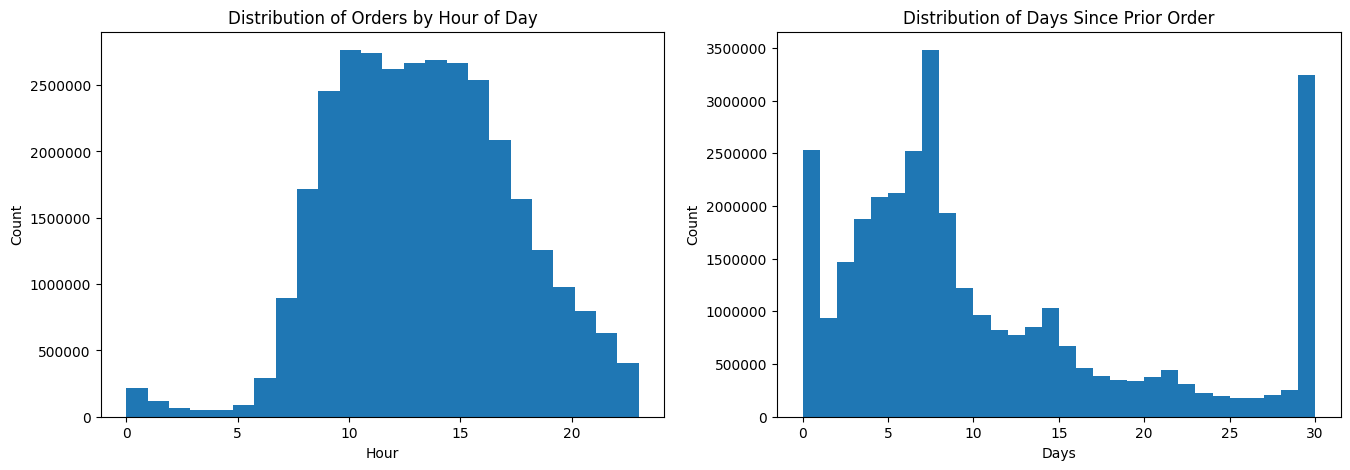

In [65]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
axes[0].hist(full_priors['order_hour_of_day'],bins=24)
axes[0].set_title('Distribution of Orders by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
axes[0].ticklabel_format(style='plain')

axes[1].hist(full_priors['days_since_prior_order'],bins=30)
axes[1].set_title('Distribution of Days Since Prior Order')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Count')
axes[1].ticklabel_format(style='plain')

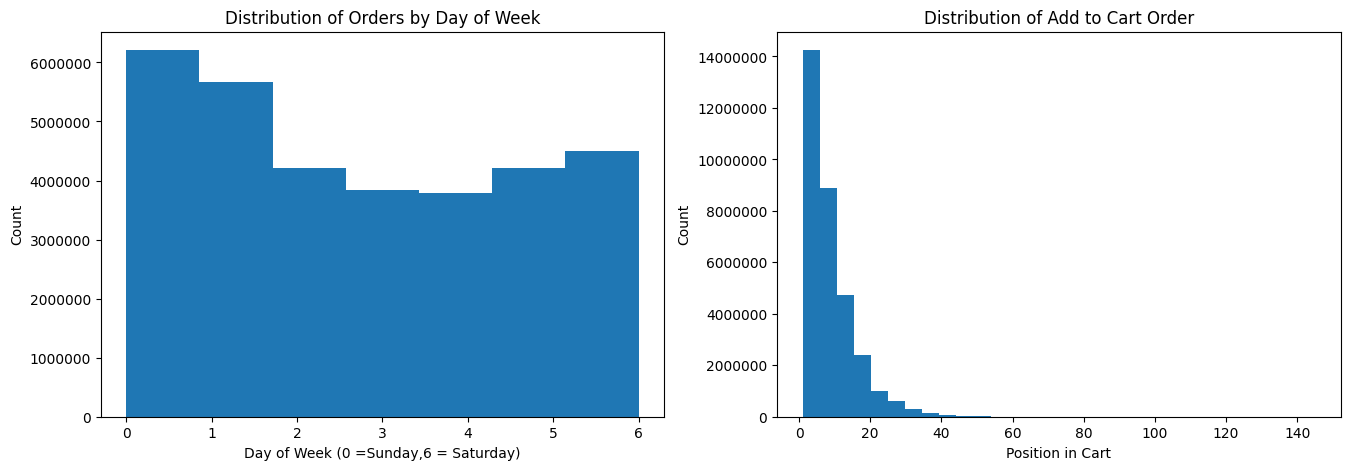

In [66]:
fig,axes=plt.subplots(1,2,figsize=(16,5))

axes[0].hist(full_priors['order_dow'],bins=7)
axes[0].set_title('Distribution of Orders by Day of Week')
axes[0].set_xlabel('Day of Week (0 =Sunday,6 = Saturday)')
axes[0].set_ylabel('Count')
axes[0].ticklabel_format(style='plain')

axes[1].hist(full_priors['add_to_cart_order'],bins=30)
axes[1].set_title('Distribution of Add to Cart Order')
axes[1].set_xlabel('Position in Cart')
axes[1].set_ylabel('Count')
axes[1].ticklabel_format(style='plain')



## Target Variable Analysis

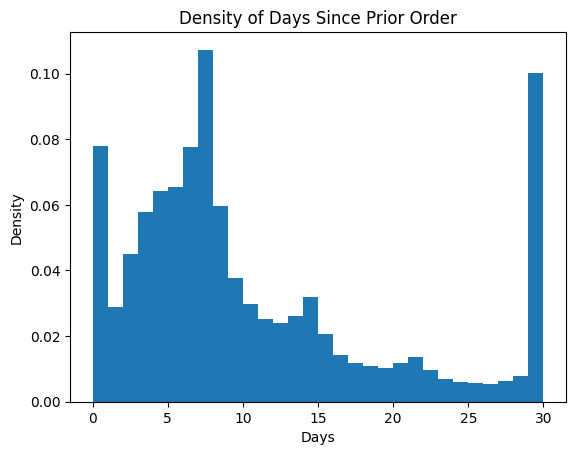

In [67]:
plt.hist(full_priors['days_since_prior_order'],bins=30,density=True)
plt.title('Density of Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()


Reorder rate: 0.59


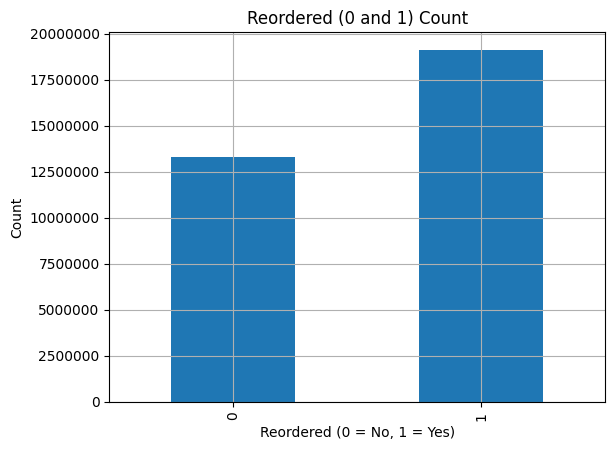

In [68]:
reorder_rate = full_priors['reordered'].mean()
print("Reorder rate:", reorder_rate.round(2))

full_priors['reordered'].value_counts().sort_index().plot(kind='bar',grid=True)
plt.xlabel('Reordered (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Reordered (0 and 1) Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [69]:
categorical_cols = ['order_dow','order_hour_of_day','aisle','department','product_name']
full_priors[categorical_cols].nunique().to_frame(name='unique_values')

,unique_values
order_dow,7
order_hour_of_day,24
aisle,134
department,21
product_name,49677


### Categorical Feature Analysis


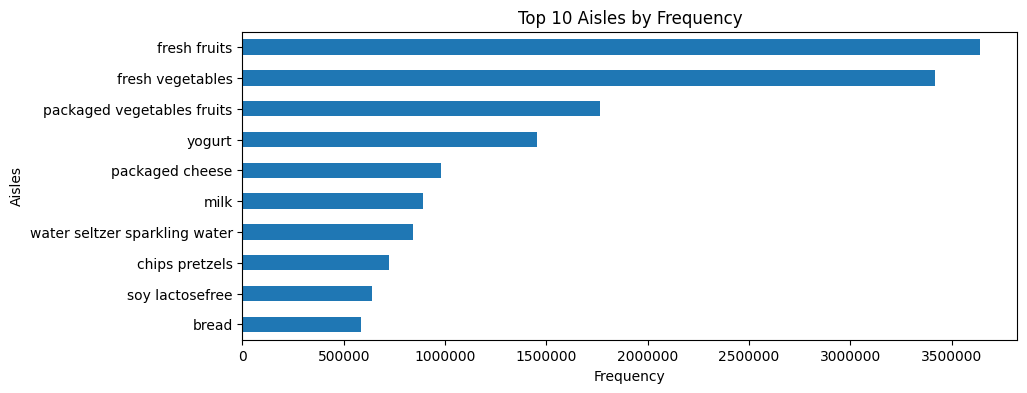

In [70]:
full_priors['aisle'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(10,4))
plt.xlabel('Frequency')
plt.ylabel('Aisles')
plt.title("Top 10 Aisles by Frequency")
plt.ticklabel_format(style='plain',axis='x')

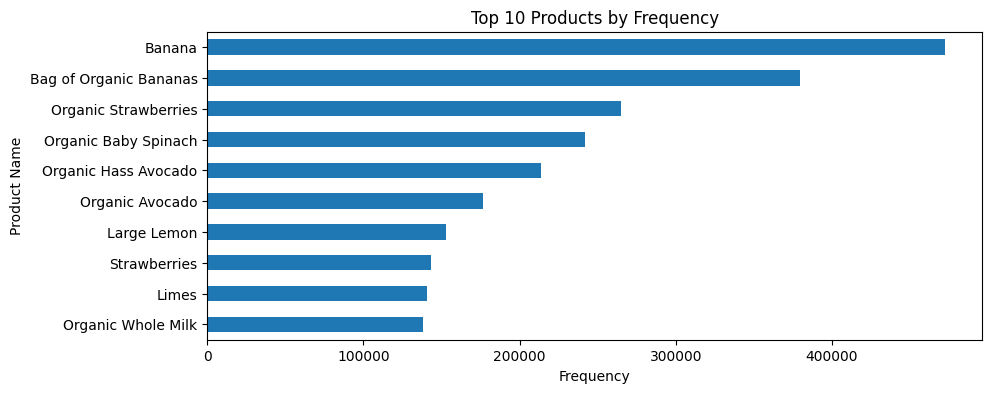

In [72]:
full_priors['product_name'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(10,4))
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.title("Top 10 Products by Frequency")
plt.ticklabel_format(style='plain',axis='x')

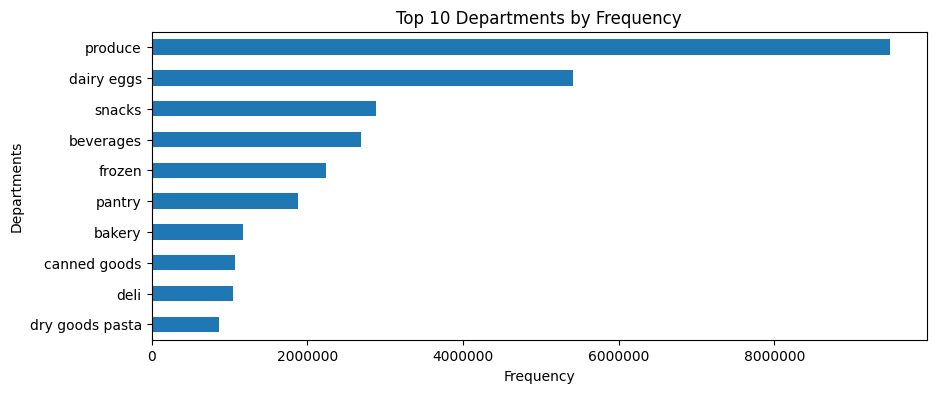

In [73]:
full_priors['department'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(10,4))
plt.xlabel('Frequency')
plt.ylabel('Departments')
plt.title("Top 10 Departments by Frequency")
plt.ticklabel_format(style='plain',axis='x')

### Correlation Analysis
Analyze feature–feature and target–feature correlations to identify relationships among numerical variables.

In [74]:
num_features = ['order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered']
corr = full_priors[num_features].corr()
corr

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
order_dow,1.000000,0.012176,-0.026520,-0.009071,-0.006949
order_hour_of_day,0.012176,1.000000,-0.000195,-0.014805,-0.023300
days_since_prior_order,-0.026520,-0.000195,1.000000,0.050260,-0.024465
add_to_cart_order,-0.009071,-0.014805,0.050260,1.000000,-0.133024
reordered,-0.006949,-0.023300,-0.024465,-0.133024,1.000000


<Axes: title={'center': 'Correlation Heatmap of Numeric Features\n (Feature - Feature)'}>

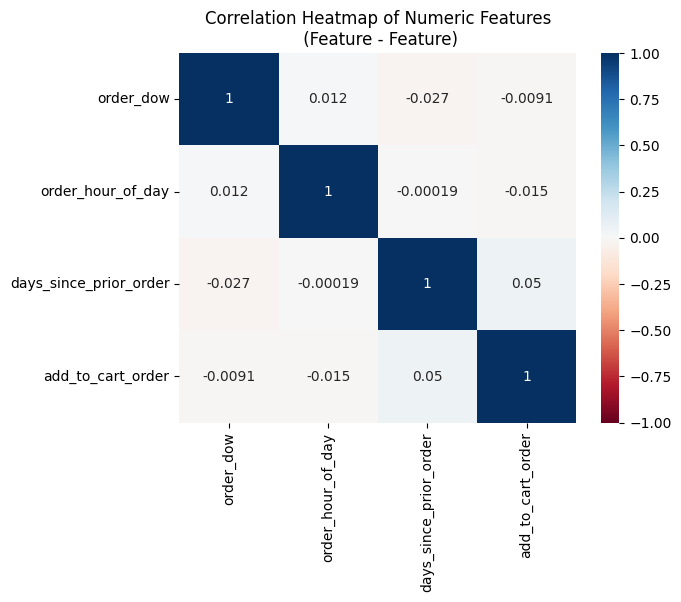

In [76]:
plt.title("Correlation Heatmap of Numeric Features\n (Feature - Feature)")
sns.heatmap(corr.drop(index='reordered', columns='reordered'),cmap='RdBu',vmin=-1,vmax=1,annot=True)

<Axes: title={'center': 'Correlation Heatmap of Target\n (Target - Feature)'}>

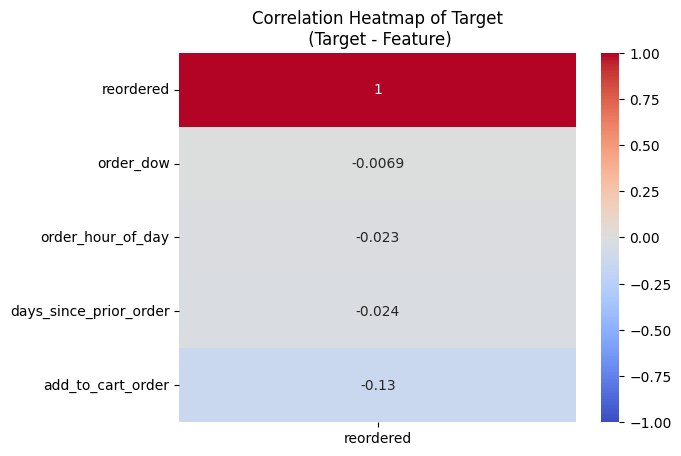

In [77]:
target_corr=corr[['reordered']].sort_values(by='reordered',ascending=False)
plt.title("Correlation Heatmap of Target\n (Target - Feature)")
sns.heatmap(target_corr,cmap='coolwarm',vmax=1,vmin=-1,annot=True)

### Pairwise Feature Relationships
Explore pairwise relationships between selected features and the target variable.


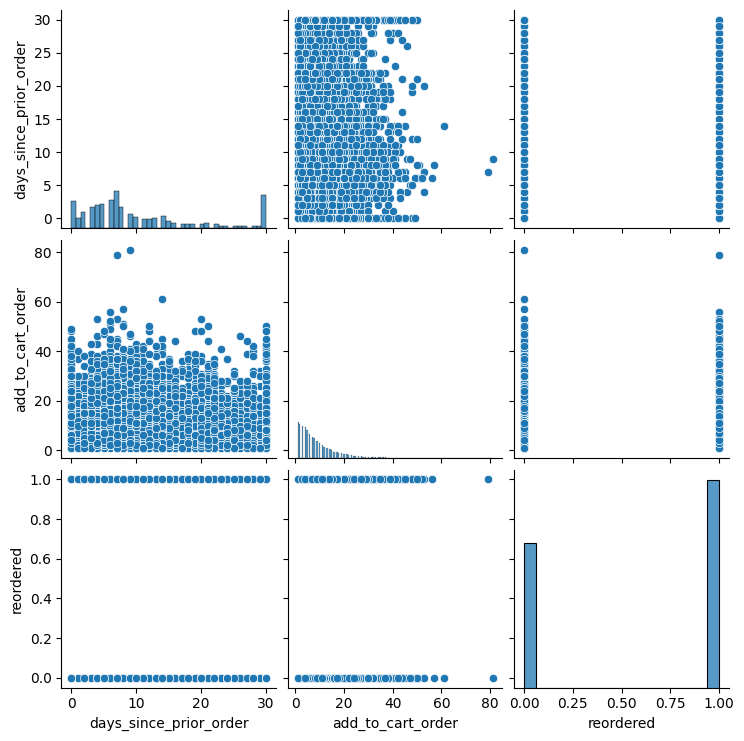

In [78]:
sns.pairplot(full_priors.sample(20000, random_state=42)[['days_since_prior_order', 'add_to_cart_order', 'reordered']])
plt.show()


## Save Processed Data


In [79]:
full_priors.to_parquet("../data/processed/full_priors.parquet")
full_train.to_parquet("../data/processed/full_train.parquet")